## Carga senal de entrada $ x[n] $

Como se realizó anteriormente, se selecciona una senal de entrada en base al numero de alumno, mediante la función `load_signal`

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Función para cargar la señal desde el archivo CSV
def load_signal(case_number, base_path="data/signals"):
    """
    Carga una señal desde un archivo CSV según el número de caso.

    Parámetros:
        case_number (int): Número de caso (0, 1, 2, 3).
        base_path (str): Ruta base donde se encuentran los archivos CSV.

    Retorna:
        n (numpy.ndarray): Instantes n (0 hasta longitud de la señal - 1).
        x (numpy.ndarray): Valores de la señal x[n].
    """
    # Construir la ruta del archivo CSV
    file_path = os.path.join(base_path, f"case{case_number}.csv")
    
    # Verificar si el archivo existe
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"El archivo {file_path} no existe.")
    
    # Cargar los valores de la señal desde el archivo CSV
    x = np.loadtxt(file_path, delimiter=",")
    
    # Generar los instantes n (0, 1, ..., len(x)-1)
    n = np.arange(len(x))
    
    return n, x

## Se definen los sistemas

Se definen los sistemas como funciones.

- N es la longitud de la senal de entrada.
- se inicializa la salida y con ceros.
- se realiza una convolucion de forma iterativa



In [2]:

# Definir las implementaciones de los sistemas (previamente implementados)
def sistema1(x):
    N = len(x)
    y = np.zeros(N)
    for n in range(N):
        y[n] = 0.5 * x[n]
        if n > 0:
            y[n] += 0.5 * x[n-1]
    return y

def sistema2(x):
    N = len(x)
    y = np.zeros(N)
    for n in range(N):
        y[n] = 0.5 * x[n]
        if n > 0:
            y[n] -= 0.5 * x[n-1]
    return y

def sistema3(x):
    N = len(x)
    y = np.zeros(N)
    for n in range(N):
        y[n] = 0.25 * x[n]
        if n > 0:
            y[n] += 0.25 * x[n-1]
            y[n] += 0.5 * y[n-1]
    return y

def sistema4(x):
    N = len(x)
    y = np.zeros(N)
    for n in range(N):
        y[n] = 0.25 * x[n]
        if n > 0:
            y[n] -= 0.25 * x[n-1]
            y[n] -= 0.5 * y[n-1]
    return y


## Se aplica la entrada al sistema

Se aplica la entrada $ x[n] $ en cada uno de los sistemas, y se grafican

El número de caso seleccionado es: 1


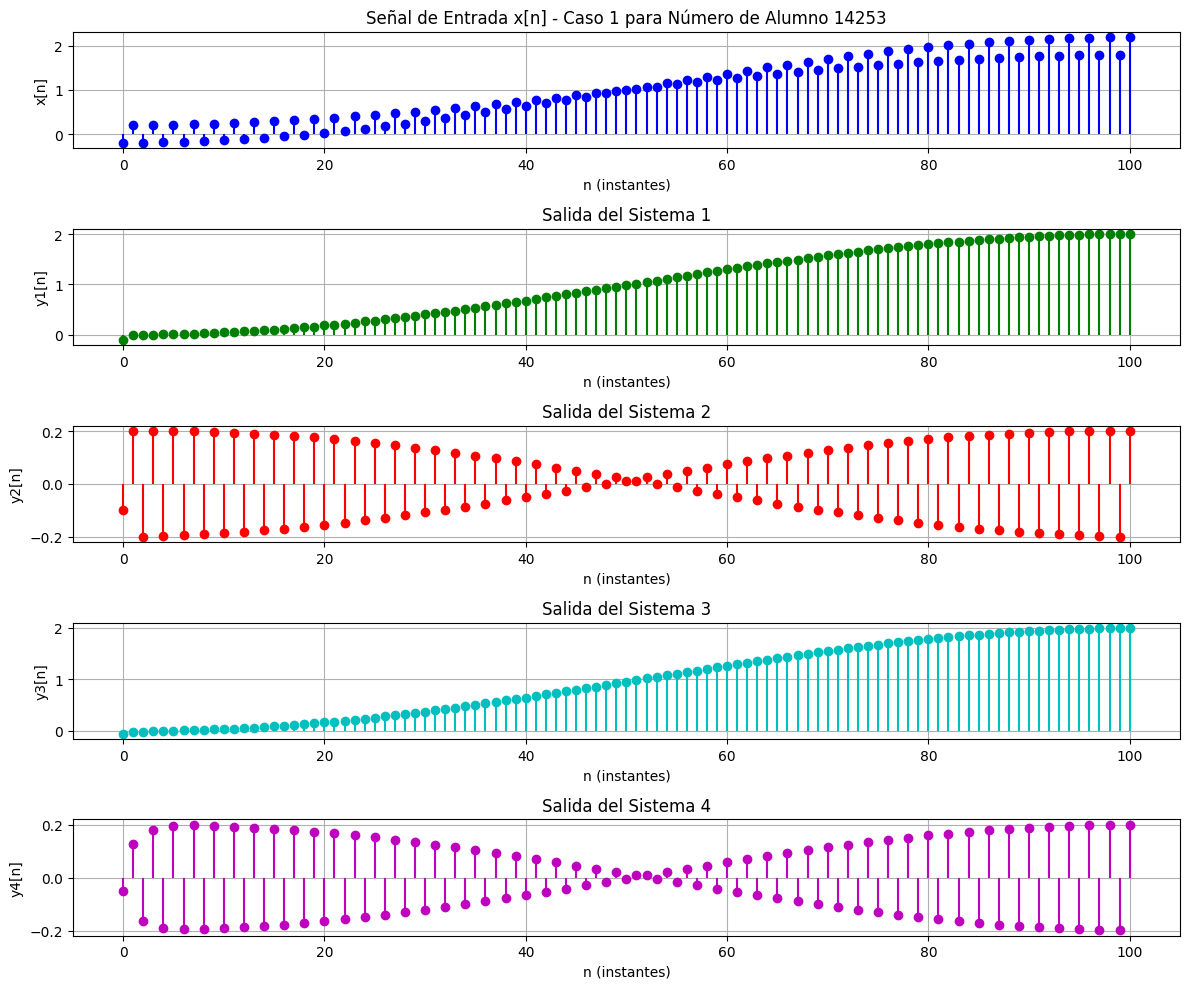

In [3]:

# Número de alumno y selección de caso
num_al = 14253  # Número de alumno
case_number = num_al % 4  # Determinar el número de caso
print(f"El número de caso seleccionado es: {case_number}")

# Cargar la señal correspondiente
n, x = load_signal(case_number)

# Aplicar los sistemas a la señal de entrada
y1 = sistema1(x)
y2 = sistema2(x)
y3 = sistema3(x)
y4 = sistema4(x)

# Graficar las señales de salida
plt.figure(figsize=(12, 10))

# Señal de entrada
plt.subplot(5, 1, 1)
plt.stem(n, x, basefmt=" ", linefmt="b-", markerfmt="bo")
plt.title(f"Señal de Entrada x[n] - Caso {case_number} para Número de Alumno {num_al}")
plt.xlabel("n (instantes)")
plt.ylabel("x[n]")
plt.grid()

# Salida del Sistema 1
plt.subplot(5, 1, 2)
plt.stem(n, y1, basefmt=" ", linefmt="g-", markerfmt="go")
plt.title("Salida del Sistema 1")
plt.xlabel("n (instantes)")
plt.ylabel("y1[n]")
plt.grid()

# Salida del Sistema 2
plt.subplot(5, 1, 3)
plt.stem(n, y2, basefmt=" ", linefmt="r-", markerfmt="ro")
plt.title("Salida del Sistema 2")
plt.xlabel("n (instantes)")
plt.ylabel("y2[n]")
plt.grid()

# Salida del Sistema 3
plt.subplot(5, 1, 4)
plt.stem(n, y3, basefmt=" ", linefmt="c-", markerfmt="co")
plt.title("Salida del Sistema 3")
plt.xlabel("n (instantes)")
plt.ylabel("y3[n]")
plt.grid()

# Salida del Sistema 4
plt.subplot(5, 1, 5)
plt.stem(n, y4, basefmt=" ", linefmt="m-", markerfmt="mo")
plt.title("Salida del Sistema 4")
plt.xlabel("n (instantes)")
plt.ylabel("y4[n]")
plt.grid()

plt.tight_layout()
plt.show()

### Conclusiones de las salidas 

#### Sistema 1

El Sistema 1 es un **filtro pasa bajas**, de **promedio movil** de orden 1.

La salida obtenida **suaviza** la señal de entrada. Se observa el patron de crecimiento de la señal de entrada, pero **menos oscilante**. Esto se debe a que el valor de $ y[n] $ es el promedio ponderado de x[n] y x[n-1], lo cual atenua frecuencias altas.

#### Sistema 2

El Sistema 2 es un **filtro pasa altas**. La salida resalta los cambios bruscos de la senal de entrada. Aqui destaca la baja amplitud de la salida, en comparacion con los valores de entrada. Esto se debe a la diferencia entre valores consecutivos de $ x[n] $.

#### Sistema 3

El Sistema 3 es un **filtro pasa bajas** recursivo (con termino de retroalimentacion). Al igual que el Sistema 1, suaviza la senal de entrada.

#### Sistema 4

El Sistema 4 es un **filtro pasa altas** recursivo, con retroalimentacion negativa. Amplifica los cambios rapidos e introduce el efecto de alternancia.

## Se obtiene la TFTD de las salidas

Para realizar un analisis del comportamiento de las frecuencias al aplicar los distintos sistemas, se aplica la TFTD a las salidas.

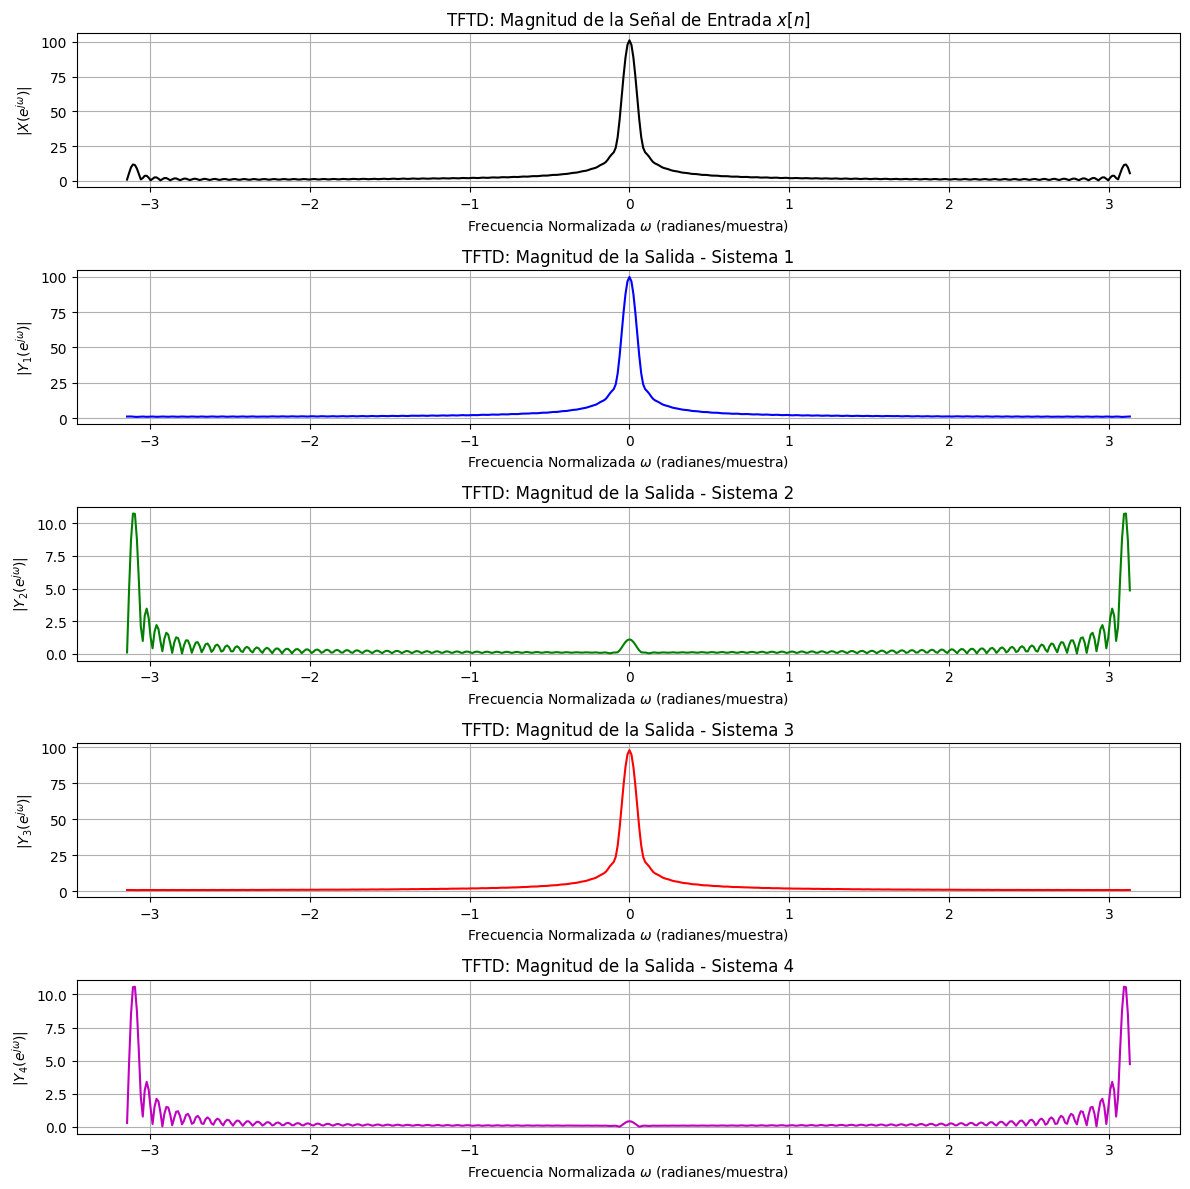

In [4]:
# Calcular la TFTD de la señal de entrada x[n]
fft_x = np.fft.fft(x, n=512)  # FFT con cero-padding hasta 512 puntos
fft_x_shifted = np.fft.fftshift(fft_x)  # Desplazar para centrar en ω = 0

# Calcular la TFTD de las salidas
fft_y1 = np.fft.fft(y1, n=512)
fft_y2 = np.fft.fft(y2, n=512)
fft_y3 = np.fft.fft(y3, n=512)
fft_y4 = np.fft.fft(y4, n=512)

# Frecuencias normalizadas
frequencies = np.fft.fftfreq(512, d=1) * 2 * np.pi  # Rango de -π a π
frequencies_shifted = np.fft.fftshift(frequencies)

# Desplazar las FFT para centrar en ω = 0
fft_y1_shifted = np.fft.fftshift(fft_y1)
fft_y2_shifted = np.fft.fftshift(fft_y2)
fft_y3_shifted = np.fft.fftshift(fft_y3)
fft_y4_shifted = np.fft.fftshift(fft_y4)

# Graficar las respuestas en frecuencia
plt.figure(figsize=(12, 12))

# Magnitud de la TFTD - Señal de Entrada
plt.subplot(5, 1, 1)
plt.plot(frequencies_shifted, np.abs(fft_x_shifted), color='k')
plt.title("TFTD: Magnitud de la Señal de Entrada $x[n]$")
plt.xlabel(r"Frecuencia Normalizada $\omega$ (radianes/muestra)")
plt.ylabel(r"$|X(e^{j\omega})|$")
plt.grid()

# Magnitud de la TFTD - Sistema 1
plt.subplot(5, 1, 2)
plt.plot(frequencies_shifted, np.abs(fft_y1_shifted), color='b')
plt.title("TFTD: Magnitud de la Salida - Sistema 1")
plt.xlabel(r"Frecuencia Normalizada $\omega$ (radianes/muestra)")
plt.ylabel(r"$|Y_1(e^{j\omega})|$")
plt.grid()

# Magnitud de la TFTD - Sistema 2
plt.subplot(5, 1, 3)
plt.plot(frequencies_shifted, np.abs(fft_y2_shifted), color='g')
plt.title("TFTD: Magnitud de la Salida - Sistema 2")
plt.xlabel(r"Frecuencia Normalizada $\omega$ (radianes/muestra)")
plt.ylabel(r"$|Y_2(e^{j\omega})|$")
plt.grid()

# Magnitud de la TFTD - Sistema 3
plt.subplot(5, 1, 4)
plt.plot(frequencies_shifted, np.abs(fft_y3_shifted), color='r')
plt.title("TFTD: Magnitud de la Salida - Sistema 3")
plt.xlabel(r"Frecuencia Normalizada $\omega$ (radianes/muestra)")
plt.ylabel(r"$|Y_3(e^{j\omega})|$")
plt.grid()

# Magnitud de la TFTD - Sistema 4
plt.subplot(5, 1, 5)
plt.plot(frequencies_shifted, np.abs(fft_y4_shifted), color='m')
plt.title("TFTD: Magnitud de la Salida - Sistema 4")
plt.xlabel(r"Frecuencia Normalizada $\omega$ (radianes/muestra)")
plt.ylabel(r"$|Y_4(e^{j\omega})|$")
plt.grid()

plt.tight_layout()
plt.show()


El primer grafico muestra el modulo de la TFTD de la senal de entrada $ x[n] $. Se observa un pico predominante en bajas frecuencias (cerca de $ \omega = 0 $), lo cual indica que la senal tiene componentes de baja frecuencia elevadas.

Ademas, se notan **componentes de alta frecuencia** cerca de $ \pm \pi $. Aunque la magnitud de estas frecuencias es mucho menor a las cercanas a cero, se observa un crecimiento notorio a medida que las frecuencias aumentan.

Los Sistemas 1 y 3, mantienen el **pico centrado en $ \omega = 0 $** similar a la senal de entrada. Y en contraste con esta, las frecuencias altas han sido **atenuadas**, como se espera en filtros pasa bajos.

Los Sistemas 2 y 4, en cambio, funcionan como **filtros pasa altos** y se observa que las **frecuencias bajas**, predominantes en la senal de entrada, se encuentran **atenuadas** casi por completo, y mantiene las frecuencias altas, que se pueden apreciar mejor en estos graficos debido al reescalado del eje de magnitud. 